## Visualizing decompositions of R

This is using Andy's approach of defining
$$
R = R_o + \sum_j q^j R_j
$$

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import utils
import viz
import response_matrix

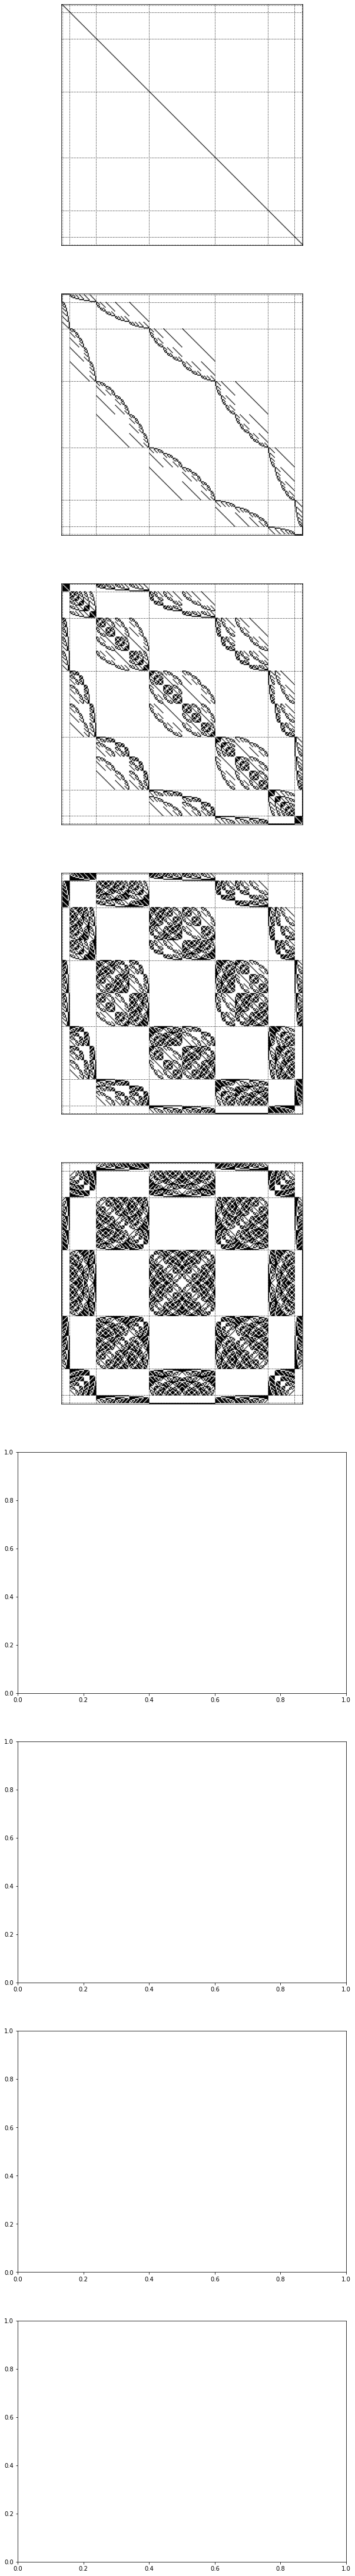

In [6]:
n = 8
d = 1 << n
fig, axes = plt.subplots(n+1, 1, figsize=(10, 80))
R = np.zeros((d, d))
for w in range(n+1):
    R_w = np.zeros((d, d))
    for i in range(d):
        for j in range(d):
            if utils.distance(i,j) == w:
                R_w[i,j] = 1
    viz.u_imshow(R_w, n, ax=axes[w], sort_by_weight=True, cmap='binary', vmin=0, vmax=1)
    axes[w].set_xticklabels([])
    axes[w].set_yticklabels([])
    axes[w].set_xticks([])
    axes[w].set_yticks([])
    u,v = np.linalg.eig(R_w)
    R += R_w
    
    if w > 3:
        break
    
plt.savefig("figures/Rj_progression.svg")

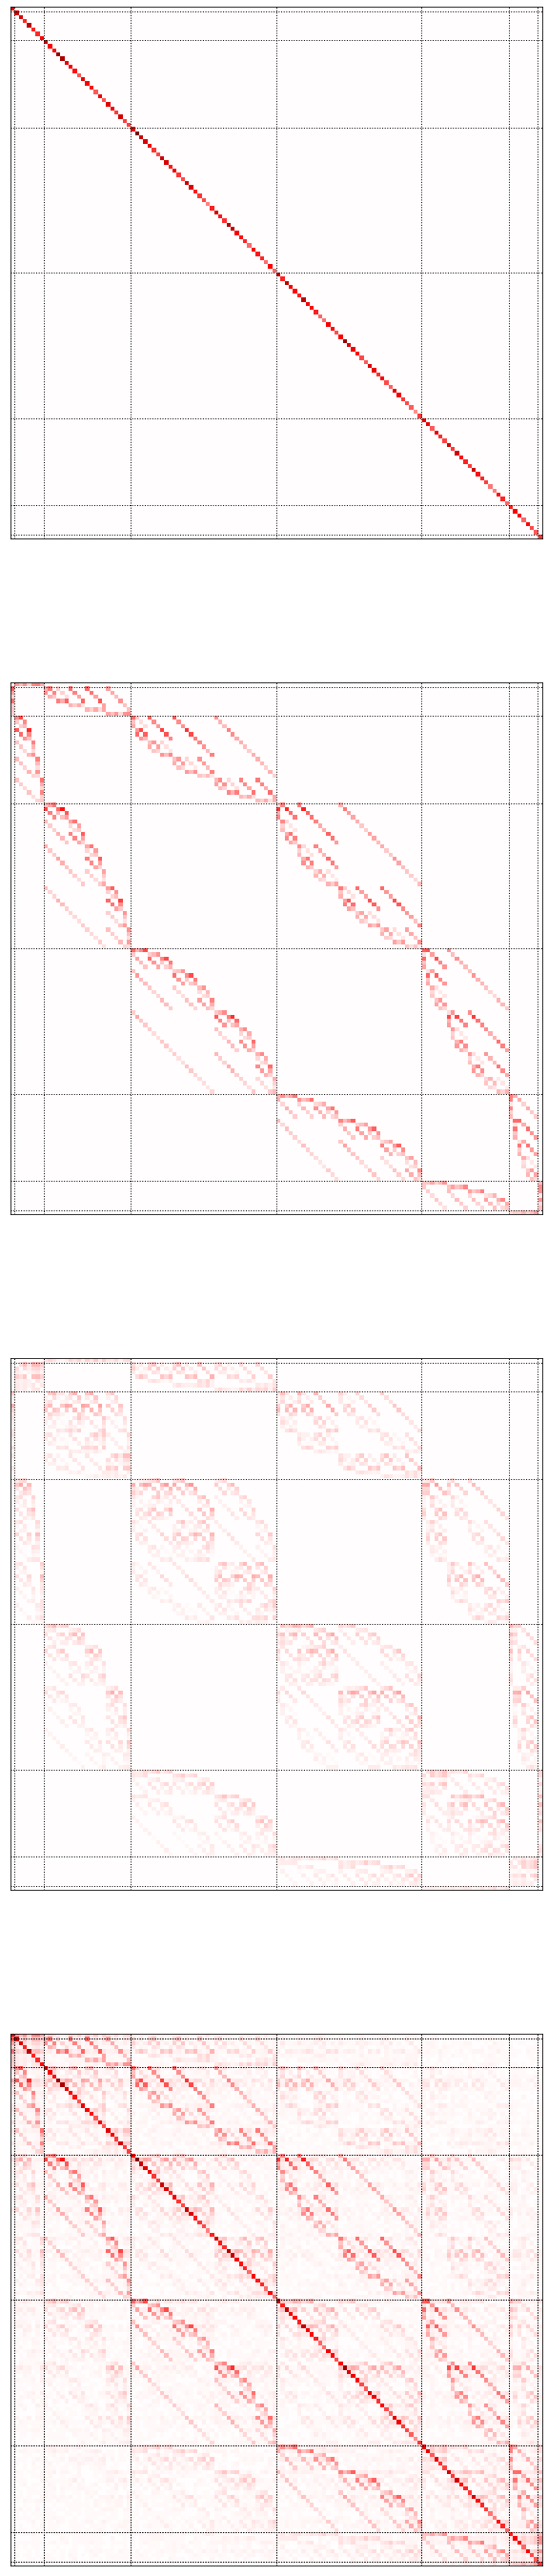

In [30]:
qfixed = 0.4
n = 7
d = 1 << n
stop = 3
R = response_matrix.generate_characteristic_R(qfixed, n)
R += 0.005 * np.random.random(size=R.shape)




fig, axes = plt.subplots(stop+1, 1, figsize=(10, 50))
for w in range(n+1):
    
    if w > stop:
        break
    
    R_w = np.zeros((d, d))
    for i in range(d):
        for j in range(d):
            if utils.distance(i,j) == w:
                R_w[i,j] = R[i,j]
    viz.u_imshow(R_w, n, ax=axes[w], sort_by_weight=True, cmap='seismic', vmin=-R.max(), vmax=R.max())

    
viz.u_imshow(R, n, ax=axes[-1], sort_by_weight=True, cmap='seismic', vmin=-R.max(), vmax=R.max())

for ax in axes:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig("figures/Rj_progression.svg")

In [10]:
np.reciprocal(np.diag(A))

array([1.        , 0.16666667, 0.09090909, 0.0625    ])